<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')
pandas.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [ ]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [ ]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.77,145.09,60,nan,nan
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.77,144.98,35,200.00,803.00
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.86,144.98,159,1253.00,4452.00


## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
##FUNCION para el estudio de las variables

def estudio(serie,out=(0.01,0.99),n=8,bin=50,size=(18,7),variable='ninguna',min=None): 

  #Serie a estudiar, definición de limites outliers, cantidad de categorias para variables categoricas y discretas, 
  #cantidad de bins para continuas y tamaño de la figura
  resultado=None
  print('Cantidad de NaN:',serie.isna().sum()) #Cantidad de valores Nan en la Serie
  
  #Determinación del tipo de variable
  if variable=='ninguna':
    if serie.dtype.name in ('object','category'):
      serie=serie.astype('category')
      variable='categoria'
    elif serie.dtype.name in ('float','float64','float32','float16'):
      variable='continua'
    elif serie.dtype.name in ('int','int32','int64','int16','Int8','Int16','Int32','int8'):
      variable='discreta'

  print('Tipo de variable: ',variable)


  #CATEGORICAS

  if variable=='categoria':
    countplt, ax = plt.subplots(figsize = size)
    categorias=serie.unique()
    print('Cantidad de valores unicos:',len(categorias))
    resumen=serie.value_counts()
    if min!=None:
      filtro=resumen>min
      n=filtro.sum()
    if len(categorias)<=n:
      nva=resumen.nlargest(n)
      orden=list(nva.index)
      ax=seaborn.countplot(x=serie,order=orden)
    else:
      dict={}
      nva=resumen.nlargest(n-1)
      orden=list(nva.index)
      for i in resumen.index:
        if resumen.loc[i]<nva.iloc[-1]:
          dict[i]='Otro'
        else:
          dict[i]=i
      orden=orden+['Otro']
      serie2=serie.replace(dict)
      resultado=(serie2)
      ax=seaborn.countplot(x=serie2,order=orden)
    for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
    plt.xticks(rotation=30);
    

  #Continuas

  elif variable=='continua':
    if out != 0:
      limite_sup=serie.quantile(out[1])
      print(f'Limite superior propuesto (cuantil {out[1]}): {limite_sup.round(2)} \nValores que quedarian fuera: {(serie>limite_sup).sum()}\n')

      limite_inf=serie.quantile(out[0])
      print(f'Limite inferior propuesto (cuantil {out[0]}): {limite_inf.round(2)}  \nValores que quedarian fuera: {(serie<limite_inf).sum()}\n')
      resultado=(limite_inf,limite_sup,serie) 
    fig, ax = plt.subplots(2,1,figsize = size)
    seaborn.histplot(serie,bins=bin,ax=ax[0])
    seaborn.boxplot(serie,ax=ax[1])
    print(serie.describe())
 
  #Discretas

  elif variable=='discreta':
    
    if out != 0:
      limite_sup=serie.quantile(out[1])
      print(f'Limite superior propuesto (cuantil {out[1]}): {limite_sup}  \nValores que quedarian fuera: {(serie>limite_sup).sum()}\n')
      limite_inf=serie.quantile(out[0])
      print(f'Limite inferior propuesto (cuantil {out[0]}): {limite_inf} \nValores que quedarian fuera: {(serie<limite_inf).sum()}\n')
      resultado=(limite_inf,limite_sup,serie)
    categorias=serie.unique()
    if len(categorias)>2*bin:
      fig, ax = plt.subplots(2,1,figsize = size)
      seaborn.histplot(serie,bins=bin,ax=ax[0])
      seaborn.boxplot(serie,ax=ax[1])
      print(serie.describe())
    else:
      resumen=serie.value_counts()
      countplt, ax = plt.subplots(figsize = size)
      categorias=serie.unique()
      if len(categorias)<=n:
        nva=resumen.nlargest(n)
        orden=list(nva.index).sort()
        ax=seaborn.countplot(x=serie,order=orden)
      else:
        dict={}
        nva=resumen.nlargest(n-1)
        for i in resumen.index:
          if resumen.loc[i]<nva.iloc[-1]:
            dict[i]='Otro'
          else:
            dict[i]=i
        serie2=serie.replace(dict)
        orden=list(nva.index)
        orden.sort()
        orden=orden+['Otro']
        ax=seaborn.countplot(x=serie2,order=orden)
        print(serie.describe())
      for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
      plt.xticks(rotation=30);
  return (resultado)



# **Respuestas**

## **Ejercicio 1**

# **1.Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.**

In [ ]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
categoricas=['Address','Regionname','Type','Suburb','Method','SellerG','Postcode','CouncilArea']
discretas=['Rooms','Car','Bedroom2','Bathroom','Propertycount','YearBuilt' ]
continuas=['Price','Distance','Lattitude','Longtitude','BuildingArea', 'Landsize'    ]
tiempo=['Date']


In [ ]:
#Cambiar tipo de dato para trabajarlos mejor
melb_df['date'] = pandas.to_datetime(melb_df.Date)
tipos={'Suburb':'category','Address':'category','Rooms':'int8', 'Type':'category',
       'Method':'category','SellerG':'category','Postcode':'category','Bedroom2':'int8',
       'Bathroom':'int8','Car':'Int8','YearBuilt':'Int16','CouncilArea':'category','Regionname':'category',
       'Propertycount':'int16'
       }

melb_df=melb_df.astype(tipos)
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  category      
 2   Rooms          13580 non-null  int8          
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  category      
 6   SellerG        13580 non-null  category      
 7   Date           13580 non-null  object        
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  category      
 10  Bedroom2       13580 non-null  int8          
 11  Bathroom       13580 non-null  int8          
 12  Car            13518 non-null  Int8          
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [ ]:
melb_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
date                0
dtype: int64

#### Estudio de la columna Precio





Cantidad de NaN: 0
Tipo de variable:  continua
Limite superior propuesto (cuantil 0.99): 3338150.0 
Valores que quedarian fuera: 136

Limite inferior propuesto (cuantil 0.005): 270000.0  
Valores que quedarian fuera: 64

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



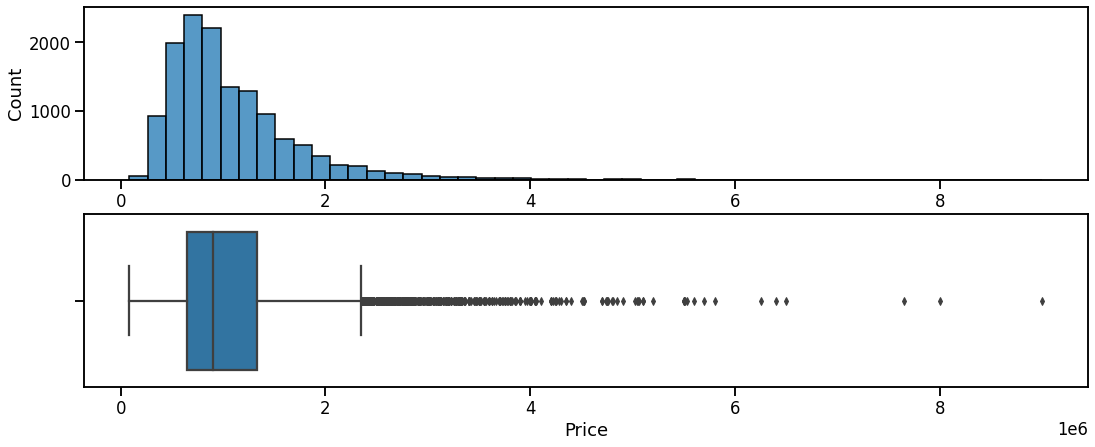

In [ ]:
precio1=melb_df['Price']
limites=estudio(precio1, out=(0.005,0.99))

Se ve que el valor máximo llega a **9.000.000 USD** cuando el tercer cuartil es **1.330.000 USD**.

Analizando el histograma y los parametros descriptivos se ve la existencia de outliers, sobre todo para el lado del máximo. 


Se podria tomar como limite superior para dejar fuera los outliers superiores, el percentil del **99%**, dejando afuera solo **136 valores**.

Por lo tanto se toma como limite superior el valor de **3.338.150 USD**

Se podria tomar como limite inferior para dejar fuera los outliers inferiores, el percentil del **0,5%**, dejando afuera solo **64 valores**.
se propone un limite inferior de 0,5% y no de 1% como el superior por que estan más cercanos a la media y por lo tanto tienen menos influencia que los superiores. 

Por lo tanto se toma como limite inferior el valor de **270.000,0 USD** y se procede a relaizar el histograma final y una descricion de la variable **'Price'**

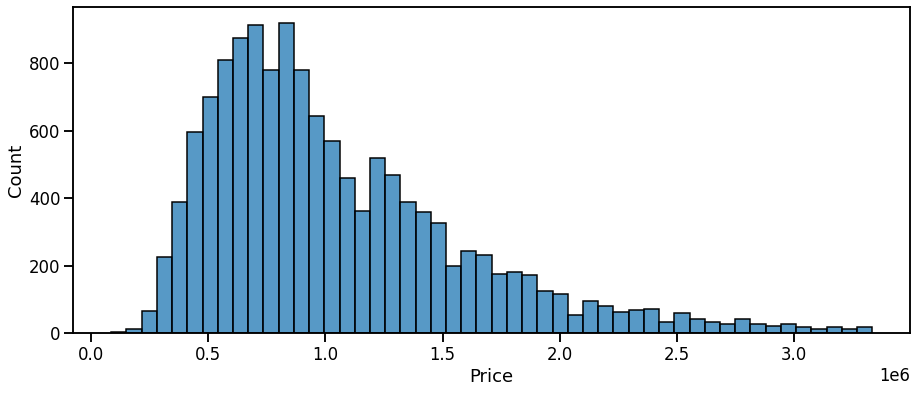

In [ ]:
f,ax=plt.subplots(figsize=(15,6))
precio2=melb_df[(melb_df['Price']<limites[1])]['Price']
seaborn.histplot(precio2,bins=50)

Cantidad de NaN: 0
Tipo de variable:  continua


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



count     13380.00
mean    1048113.11
std      551015.71
min      270000.00
25%      650000.00
50%      900000.00
75%     1320000.00
max     3335000.00
Name: Price, dtype: float64


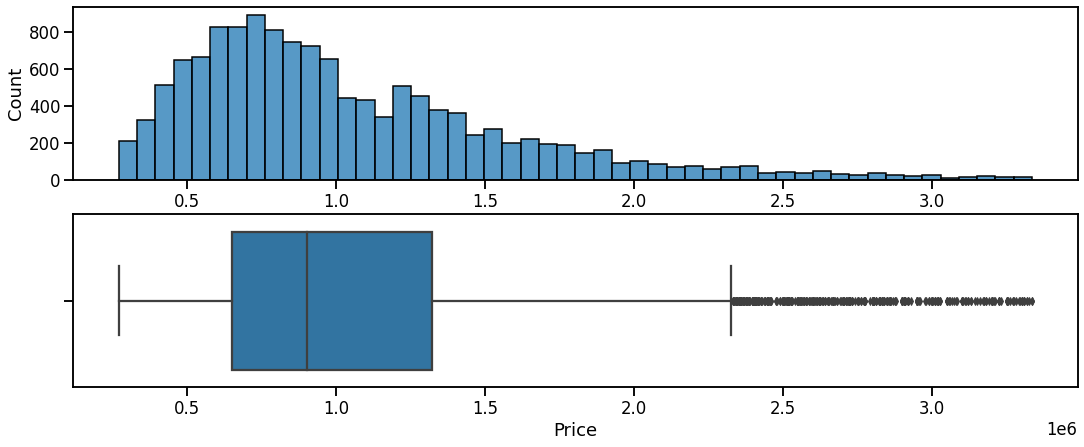

In [ ]:
df=melb_df[(melb_df['Price']>=limites[0]) & (melb_df['Price']<=limites[1])]
precio=df['Price']
estudio(precio,out=0)

#### Estudio de otras Variables

##### Analisis de **Rooms** y **Bedrooms2**

Cantidad de NaN: 0
Tipo de variable:  discreta


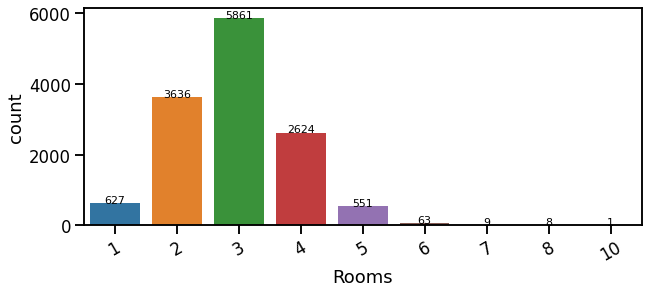

In [ ]:
estudio(df['Rooms'],out=0,n=9,size=(10,4))

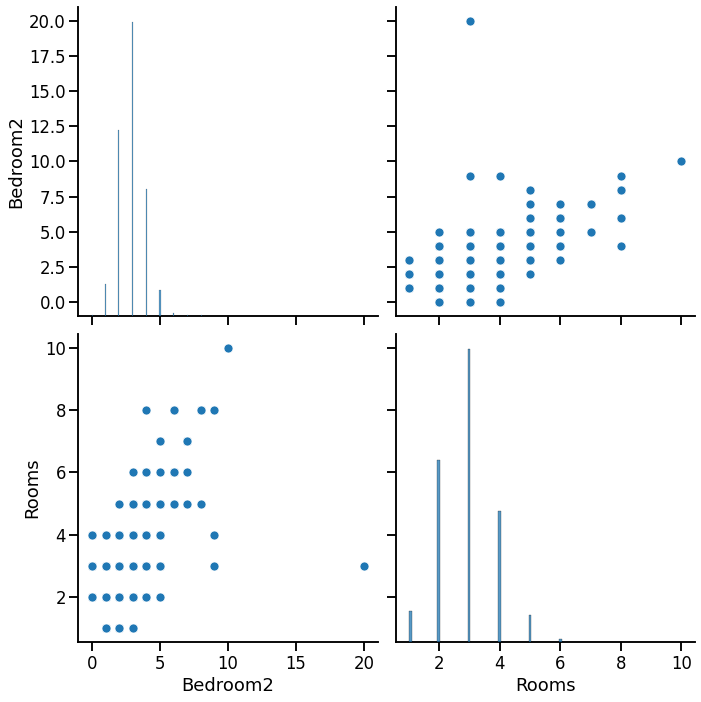

In [ ]:
seaborn.pairplot(df.loc[:,('Bedroom2','Rooms')],height=5)

In [ ]:
print('Propiedades con Bedroom2>Rooms: ',len(df.loc[(df['Bedroom2']>df['Rooms'])]))
print('Propiedades con Bedroom2=Rooms: ',len(df.loc[(df['Bedroom2']==df['Rooms'])]))
print('Propiedades con Bedroom2<Rooms: ',len(df.loc[(df['Bedroom2']<df['Rooms'])]))
print('Correlacion: ',df['Bedroom2'].corr(df['Rooms']).round(2))

Propiedades con Bedroom2>Rooms:  197
Propiedades con Bedroom2=Rooms:  12723
Propiedades con Bedroom2<Rooms:  460
Correlacion:  0.94


La variable Bedroom2 es obtenida por cruzar datos con otro data set lo que puede generar algunos errores, la variable Bedroom2 no deberia superar a la variable Rooms, se observa que esto sucede en 197 casos, por otro lado hay 12723 casos donde son iguales y se muestra una correlación de 0.94 entre las dos, por lo que se podria precindir de la columna Bedroom2 

Por otro lado se observa que la varible Rooms, tien pocos valores mayores a 7, por lo que se podria agrupar todos limitando a 6 como maximo, es decir asignar 7 a las propiedades que tienen 7 ,8  y 10


Cantidad de NaN: 0
Tipo de variable:  discreta


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



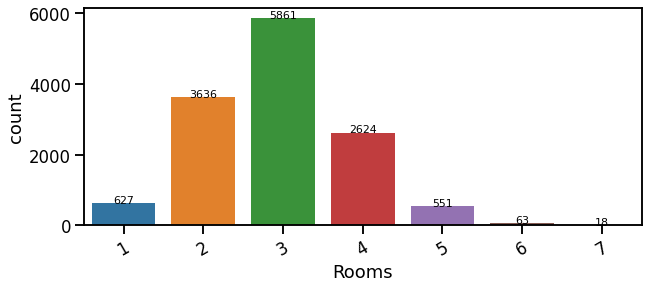

In [ ]:
df.loc[(df['Rooms']>7),'Rooms']=7
estudio(df['Rooms'],out=0,n=9,size=(10,4))


##### Analisis de **BATHROOM**

Cantidad de NaN: 0
Tipo de variable:  discreta


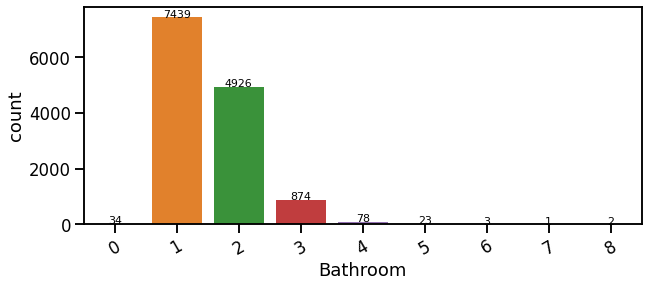

In [ ]:

estudio(df['Bathroom'],out=0,n=10,size=(10,4))

La Variable Baños tiene 34 valores nulos, que pueden estar derivados de un error, todas las propiedades deberian tener al menos 1, por otro lado al igual que la columna rooms, vamos a agrupar 5,6,7,8 en 5, limitanto a un valor maximo

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cantidad de NaN: 0
Tipo de variable:  discreta


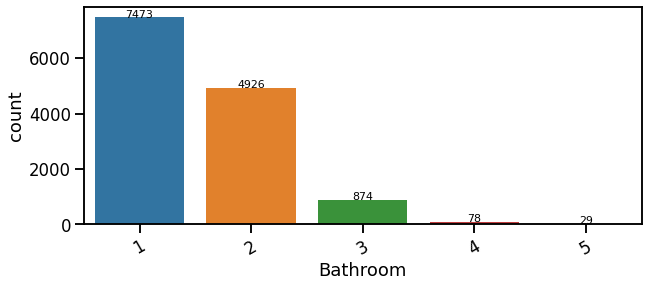

In [ ]:
df.loc[(df['Bathroom']>5),'Bathroom']=5
df.loc[(df['Bathroom']==0),'Bathroom']=1

estudio(df['Bathroom'],out=0,n=9,size=(10,4))

##### Analisis de **Car**

Cantidad de NaN: 62
Tipo de variable:  discreta
count   13318.00
mean        1.60
std         0.95
min         0.00
25%         1.00
50%         2.00
75%         2.00
max        10.00
Name: Car, dtype: float64


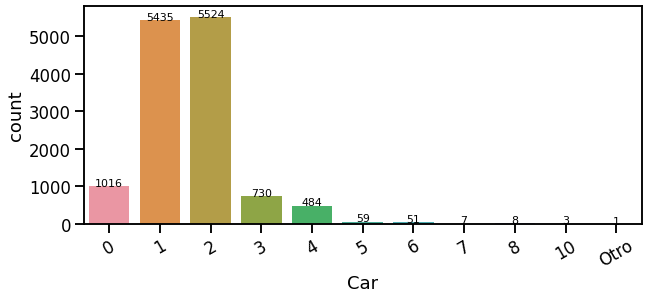

In [ ]:
estudio(df['Car'],out=0,n=11,size=(10,4))

Al igual que en las otras variables se observa que hay pocas propiedades con más de 5 lugares por lo que se van a agrupar para evitar outliers, y tambien tiene muchos valores NaN que podrian atribuirse a que no tienen espacio para auto y no se puso ningun valor, por lo que se le va a asignar 0

Cantidad de NaN: 0
Tipo de variable:  discreta


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



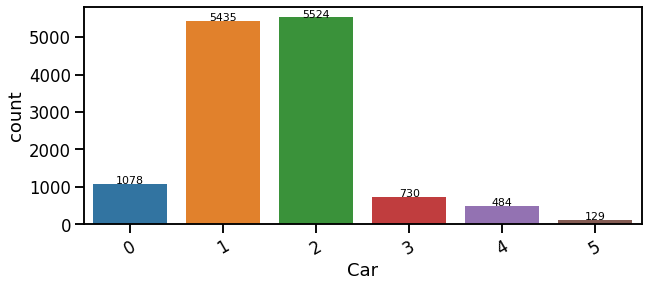

In [ ]:
df.loc[(df['Car'].isna()),'Car']=0
df.loc[(df['Car']>5) & (df['Car'].notnull() ),'Car']=5

estudio(df['Car'],out=0,n=11,size=(10,4))

##### Analisis de **YearBuilt**

Cantidad de NaN: 5310
Tipo de variable:  discreta
count   8070.00
mean    1964.85
std       37.19
min     1196.00
25%     1940.00
50%     1970.00
75%     1999.00
max     2018.00
Name: YearBuilt, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



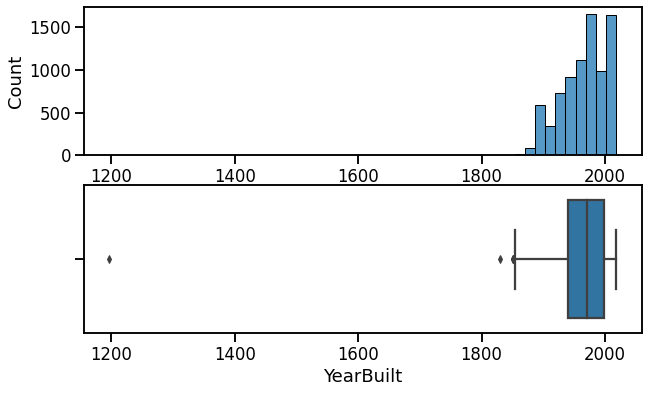

In [ ]:
estudio(df['YearBuilt'],out=0,n=11,size=(10,6))

Se observa la existencia de al menos un outlier de una propiedad del 1196, no sabemos si es un error o un valor real, por lo que vamos a proceder a eliminar la fila


In [ ]:

df=df[(df['YearBuilt']!=1196)|(df['YearBuilt'].isnull())]


Cantidad de NaN: 5310
Tipo de variable:  discreta
count   8069.00
mean    1964.94
std       36.19
min     1830.00
25%     1940.00
50%     1970.00
75%     1999.00
max     2018.00
Name: YearBuilt, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



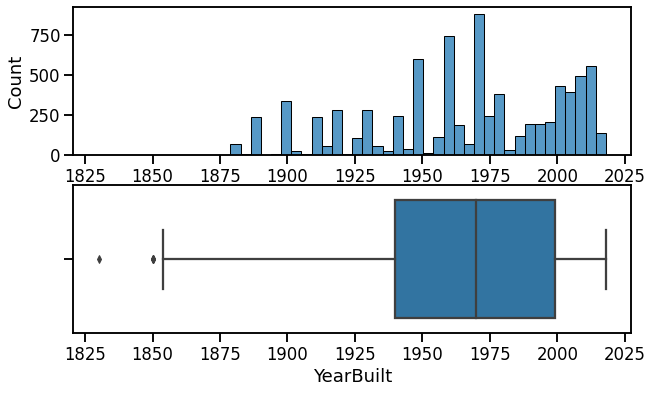

In [ ]:
estudio(df['YearBuilt'],out=0,size=(10,6))

##### Analisis de **Landsize** y **BuildingArea**

Cantidad de NaN: 0
Tipo de variable:  continua
Limite superior propuesto (cuantil 0.99): 3014.0 
Valores que quedarian fuera: 133

Limite inferior propuesto (cuantil 0): 0.0  
Valores que quedarian fuera: 0

count    13379.00
mean       557.37
std       4020.03
min          0.00
25%        177.00
50%        437.00
75%        650.00
max     433014.00
Name: Landsize, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



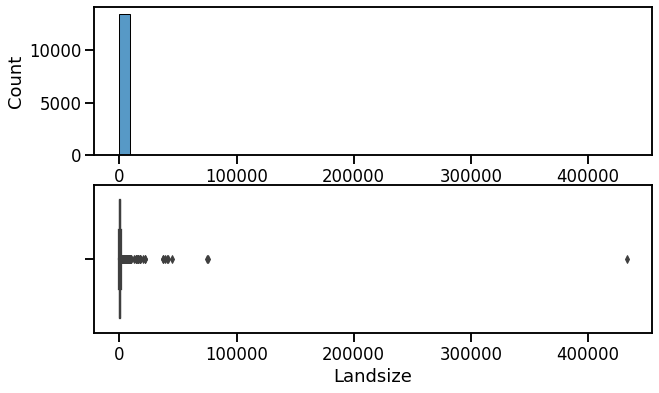

In [ ]:
limites_LS=estudio(df['Landsize'],out=(0,0.99),size=(10,6))

Cantidad de NaN: 6372
Tipo de variable:  continua
Limite superior propuesto (cuantil 0.99): 449.76 
Valores que quedarian fuera: 71

Limite inferior propuesto (cuantil 0): 0.0  
Valores que quedarian fuera: 0

count    7007.00
mean      150.42
std       545.26
min         0.00
25%        93.00
50%       125.00
75%       171.00
max     44515.00
Name: BuildingArea, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



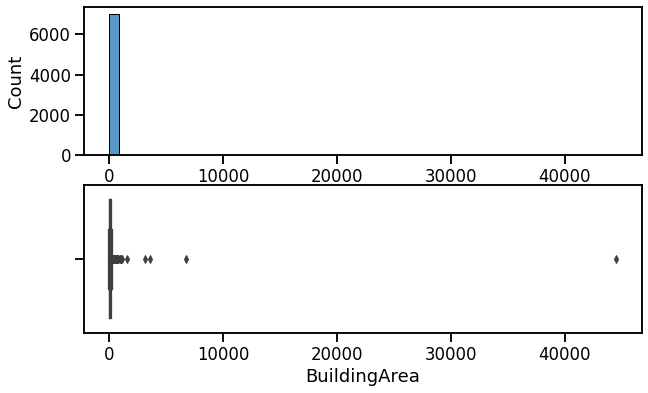

In [ ]:
limites_BA=estudio(df['BuildingArea'],out=(0,0.99),size=(10,6))

Se ven outliers en algunas variables BuildingArea y Landsize, por lo que seria conveniente trabajar sobre estos valores

In [ ]:
print(df[(df['BuildingArea']>limites_BA[1])]['BuildingArea'])
print(df[(df['Landsize']>limites_LS[1])]['Landsize'])

204       603.00
379       618.00
419       792.00
545       465.00
591       477.00
          ...   
12875     512.00
13101     575.00
13180     653.00
13245   44515.00
13518     450.00
Name: BuildingArea, Length: 71, dtype: float64
22       4290.00
687     75100.00
1035     4931.00
1361     4668.00
1378     4676.00
          ...   
13245   44500.00
13280    4425.00
13389    9405.00
13395    6000.00
13461    5750.00
Name: Landsize, Length: 133, dtype: float64


In [ ]:
df=df[(((df['BuildingArea']<= limites_BA[1])|(df['BuildingArea'].isnull())) &((df['Landsize']<=limites_LS[1])|(df['Landsize'].isnull())))]


Cantidad de NaN: 6298
Tipo de variable:  continua
count   6878.00
mean     137.85
std       67.36
min        0.00
25%       93.00
50%      125.00
75%      170.00
max      446.00
Name: BuildingArea, dtype: float64
Cantidad de NaN: 0
Tipo de variable:  continua


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



count   13176.00
mean      438.24
std       352.12
min         0.00
25%       173.00
50%       424.50
75%       647.00
max      3014.00
Name: Landsize, dtype: float64


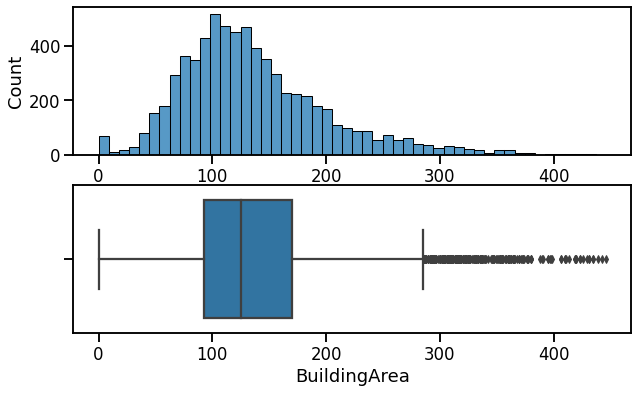

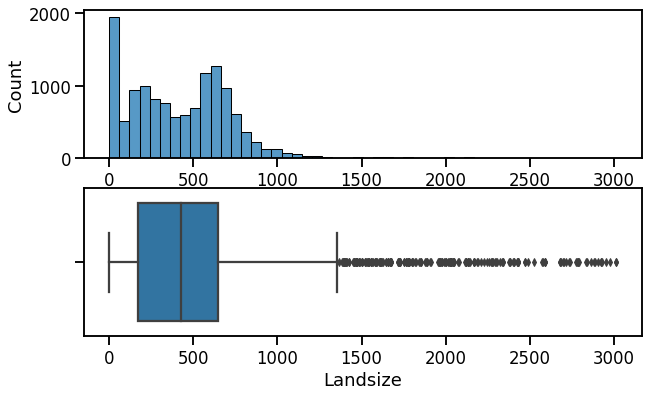

In [ ]:
estudio(df['BuildingArea'],out=0,n=11,size=(10,6))
estudio(df['Landsize'],out=0,n=11,size=(10,6))

##### Analisis de variables categoricas


 Address 

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 12983

 Regionname 

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 8

 Type 

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 3

 Suburb 

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 311

 Method 

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 5

 SellerG 

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 267

 Postcode 

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 196

 CouncilArea 

Cantidad de NaN: 1335
Tipo de variable:  categoria
Cantidad de valores unicos: 34


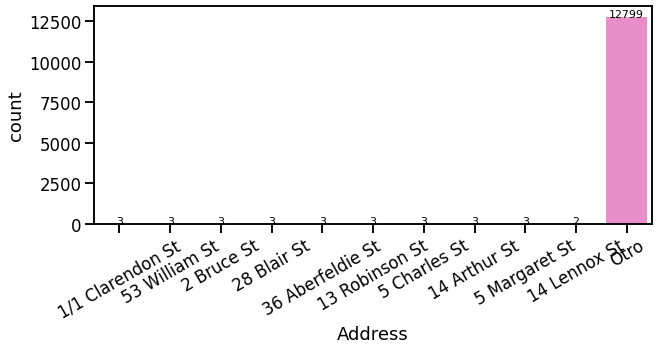

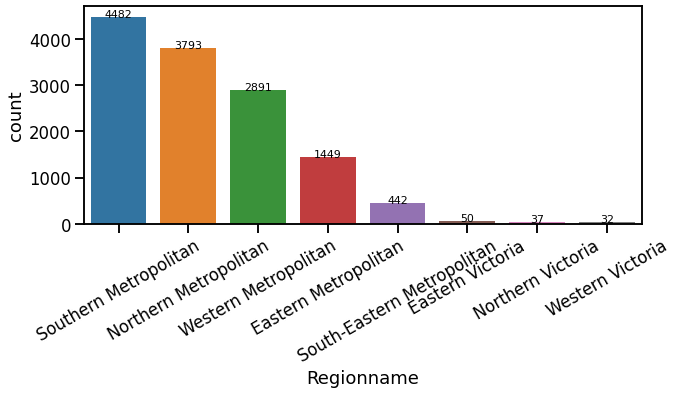

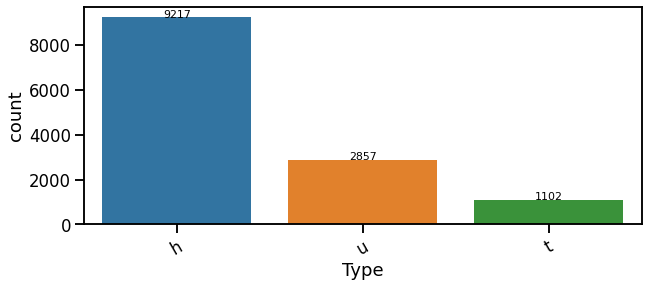

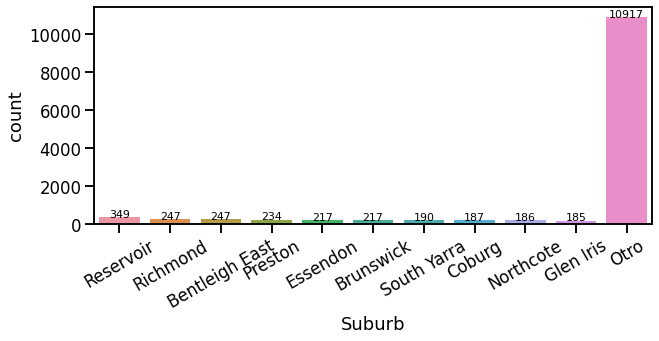

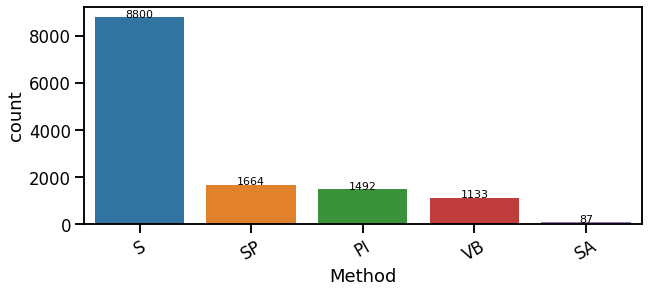

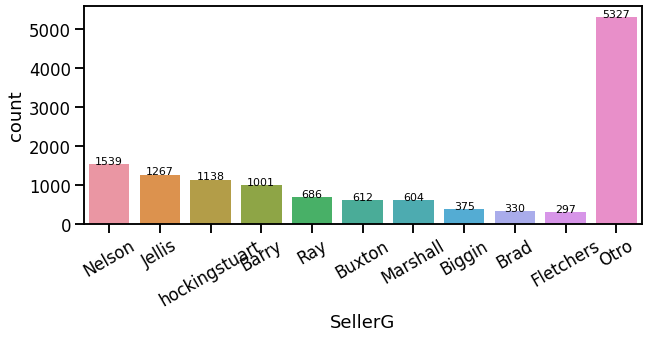

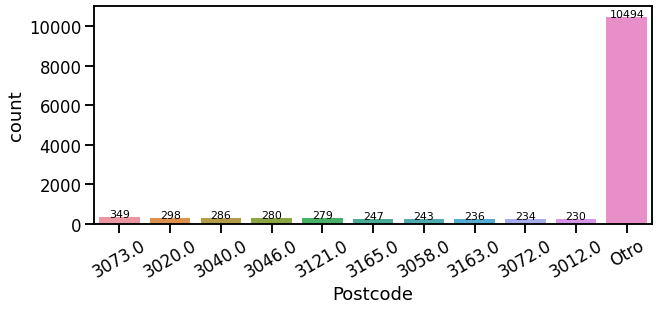

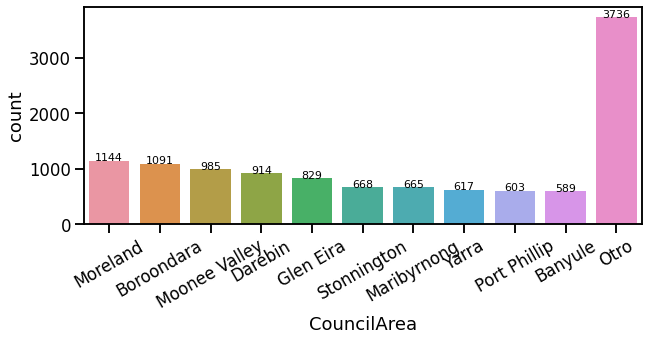

In [ ]:
for i in categoricas:
  print('\n',i,'\n')
  estudio(df[i],out=0,n=11,size=(10,4))

In [ ]:
print(len(df))

13176


### **2.Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.**
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

In [ ]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6298
YearBuilt        5236
CouncilArea      1335
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
date                0
dtype: int64

In [ ]:
variables=list(df.columns)
for variable in variables:
  print(variable,len(df[variable].unique()))

Suburb 311
Address 12983
Rooms 7
Type 3
Price 2077
Method 5
SellerG 267
Date 58
Distance 200
Postcode 196
Bedroom2 12
Bathroom 5
Car 6
Landsize 1308
BuildingArea 517
YearBuilt 143
CouncilArea 34
Lattitude 6399
Longtitude 6948
Regionname 8
Propertycount 308
date 58


#### Supresión de CouncilArea, Address, SellerG, Bedroom2

Como primer medidida se podria dejar afuera **CouncilArea**, porque segun nuestro criterio tiene muchos faltantes y puede ser reeemplazada por mejores variables que den una ubicacion aproximada de la propiedad (como puede ser Suburb o PostCode), **Address** tampoco se tendria en cuenta porque es un valor categorico que es casi unico para cada propiedad y sería mejor utilizar otras variables para definir una ubicacion.

La variable **SellerG** es una variable categorica de muchos valores posibles y el vendedor no deberia ser un factor importante en el precio de la propiedad

Por otro lado como ya se analizó la variale **Bedroom2** tiene una correlación muy alta con la variable **Rooms** y posee algunos datos erroneos, por lo que tambien se decide sacarla de estudio


 ***NOTA: debido a que en el ejercicio 2 es necesario mantener CoucilArea no se va a borrar***

#### Supresión de Date 
**Prueba de Dickey Fuller Aumentada** sobre la columan precio para saber si existe estacionalidad

Aplicamos la prueba sobre el Precio de las propiedades para saber si permanece estacionario respecto al tiempo y así eliminar la columna DATE de nuestro DataFrame

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_precio=adfuller(df['Price'], maxlag=1 )
print('El T-Test es:     ', adf_precio[0])

El T-Test es:      -57.848506554343025


Observamos en este caso que el valor obtenido es -57.84.
Sabemos por la teoría que cuanto más negativo sea este valor, es más probable que rechacemos la hipótesis nula (tenemos un conjunto de datos estacionario).

Obtenemos el P-value. Este valor nos indica la probabilidad de que la hipótesis nula no sea rechazada.

In [ ]:
print('El p-value es: ', adf_precio[1])

El p-value es:  0.0


En nuestro test tenemos que el P-value es 0, por lo tanto, existe una probabilidad del 0% de que nuestra serie temporal sea no estacionaria.

Obtenemos los valores críticos para un intervalo de confianza del 1%, del 5% y del 10%.

In [ ]:
print('Valores Críticos: ', adf_precio[4])

Valores Críticos:  {'1%': -3.4308464759855846, '5%': -2.861759418674763, '10%': -2.5668867916519673}


Podemos ver que nuestro valor estadístico de -57.84 es menor que el valor de -3,430 al 1%, menor que el valor -2.861 al 5% y menor que el valor -2.56 al 10%.

Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia de menos del 1% (es decir, una baja probabilidad de que el resultado sea una casualidad estadística).

In [ ]:
excluir={'Address','SellerG','Date','Bedroom2'}
svariables=set(variables)
svariables=svariables-excluir
variables=list(svariables)


In [ ]:

discretas=['Rooms','Car','Bathroom' ]
continuas=['Price','Distance','Lattitude','Longtitude','BuildingArea', 'Landsize','Propertycount','YearBuilt']

#### Variables Continuas


**YearBuilt** y **BuildingArea** tienen muchos valores faltantes lo que podria ser un motivo para no tenerlas en cuenta, pero es cierto que parecieran ser parametros que influirian en el precio de la propiedad, por lo que por el momento se dejarian en estudio y se va a proceder a ver las correlaciones respecto a la columna precio

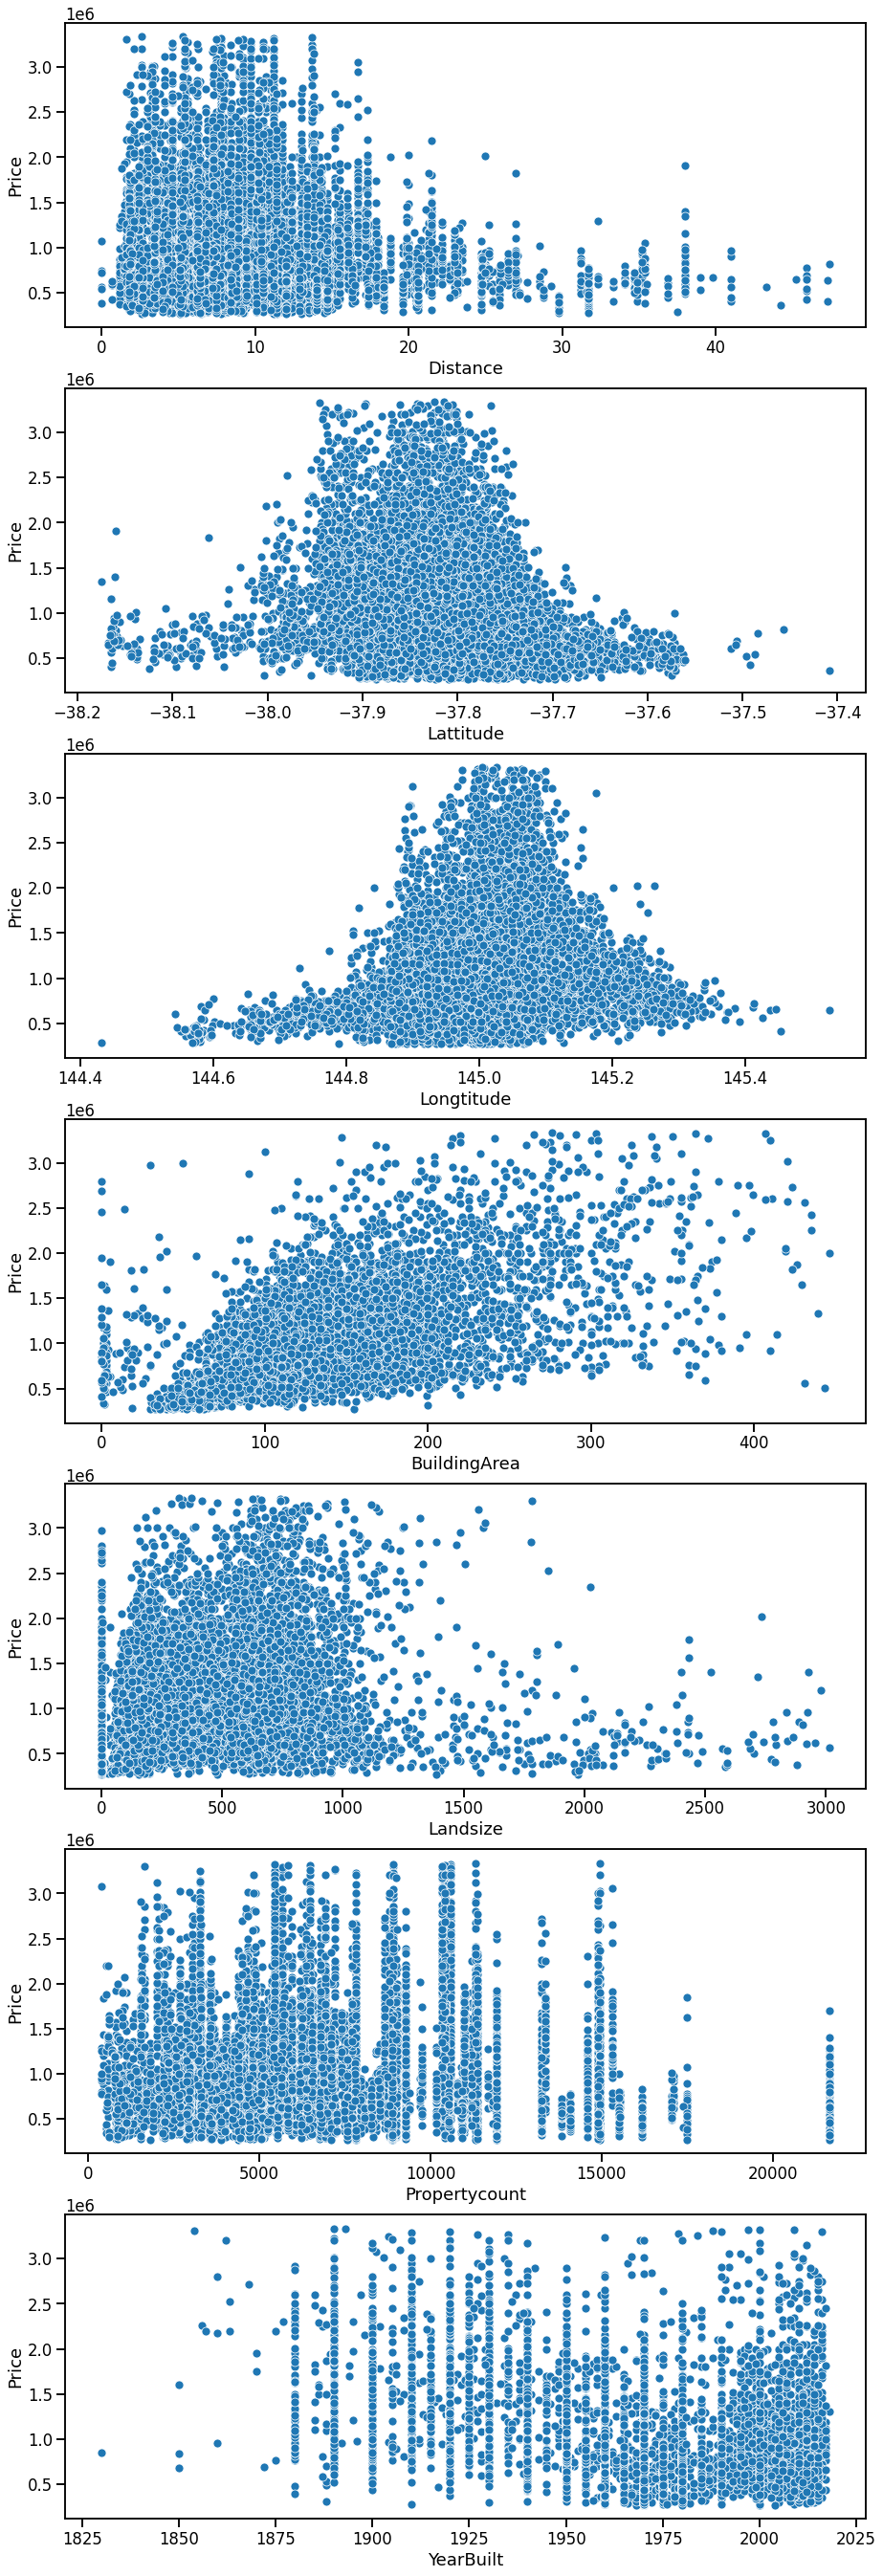

In [ ]:

f,axs=plt.subplots(len(continuas)-1,1,figsize=(15,6*len(continuas)))

for variable in continuas:
  if variable !='Price':
    seaborn.scatterplot(data=df, x=variable, y=df['Price'],ax=axs[continuas.index(variable)-1])



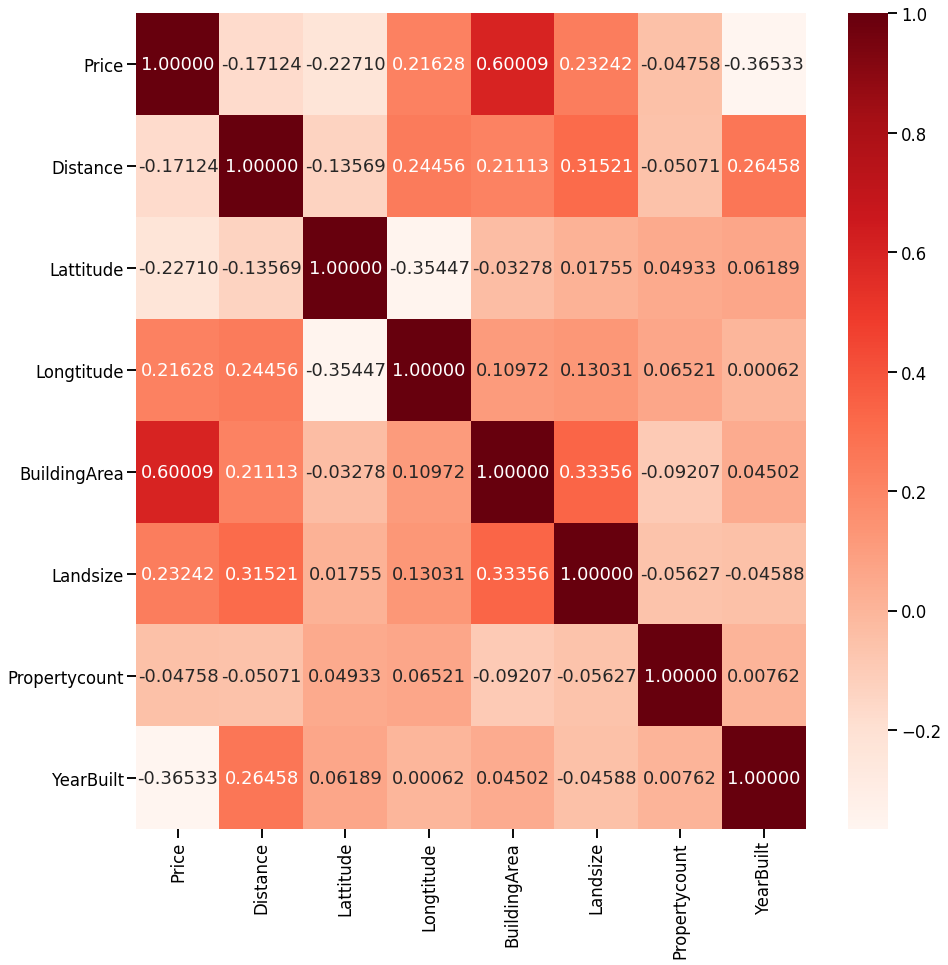

In [ ]:
#Estudiando correlaciones entre variables
correlations = df.loc[:,continuas].corr()
plt.figure(figsize=(15,15))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds, fmt='.5f')
plt.show()
#print(correlations)

La columna que tiene mayor correlación con el precio es BuildingArea, seguido de Landsize y se ve una correlación negativa respecto a YearBuilt.

La que parece no tener correlación es la variable Propertycount

#### Variables Discretas


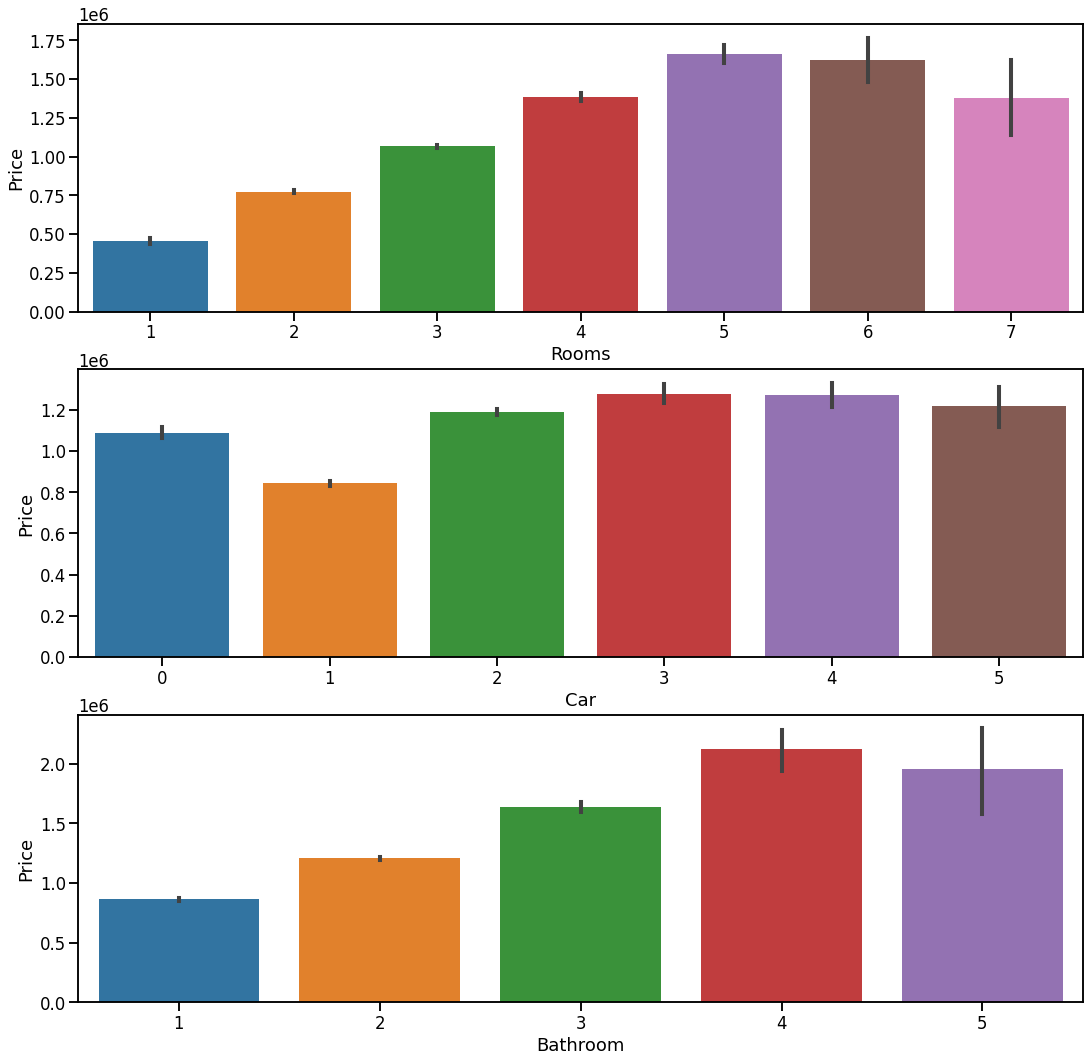

In [ ]:
f,axs=plt.subplots(len(discretas),1,figsize=(18,6*len(discretas)))
for variable in discretas:
    seaborn.barplot(data=df,x=variable,y='Price',ax=axs[discretas.index(variable)])

Todas parecen tener importancia en nuestro problema

#### Agrupamiento Categoricas

9 Regionname
3 Type
7 Suburb
5 Method
7 Postcode


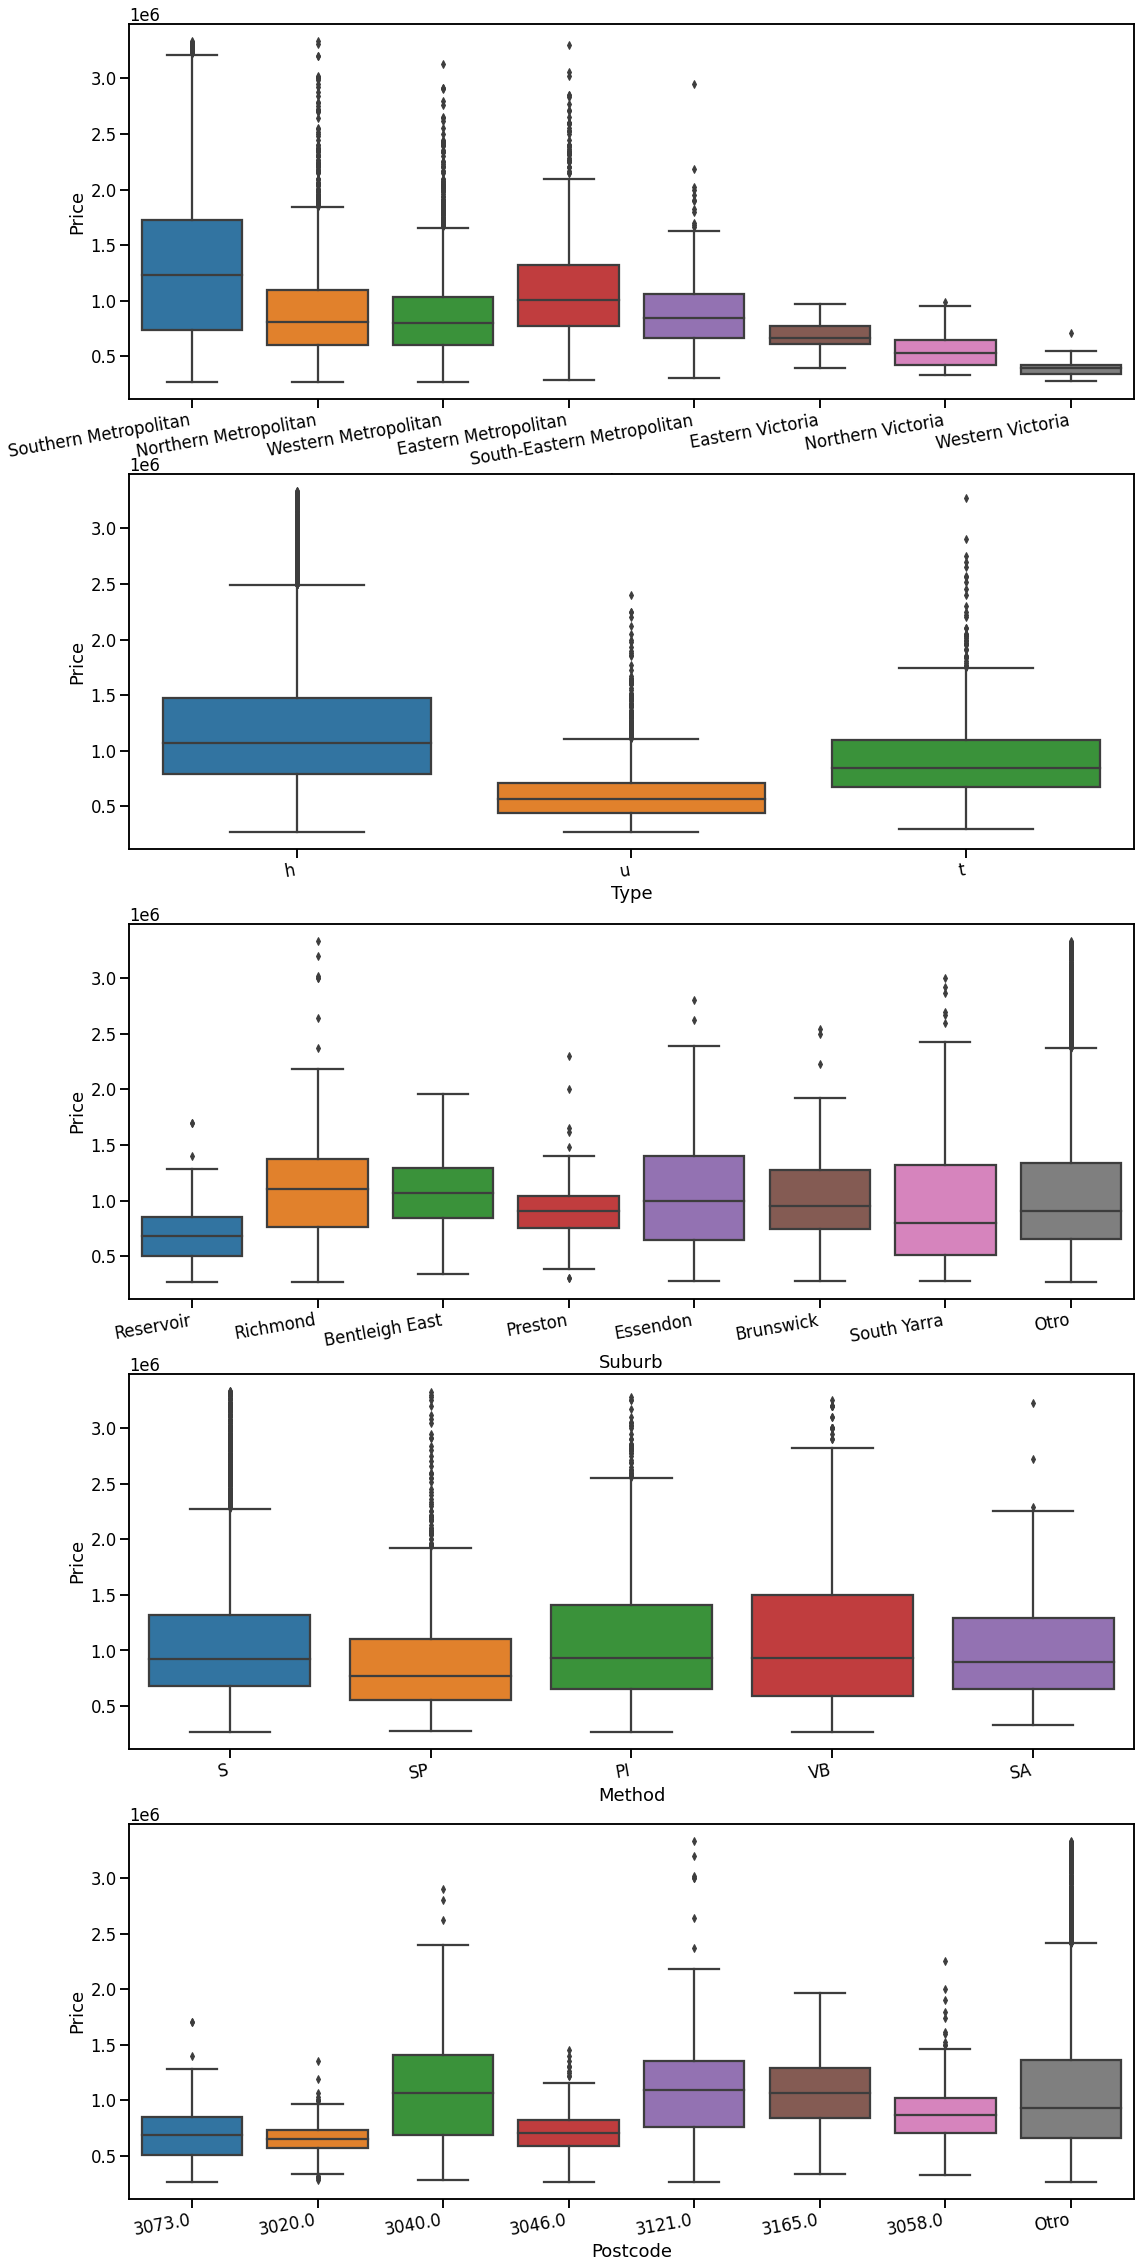

In [ ]:
categoricas=['Regionname','Type','Suburb','Method','Postcode']
f,axs=plt.subplots(len(categoricas),1,figsize=(18,8*len(categoricas)))
ns=(9,3,7,5,7)
df2=df.copy()
for n, variable in zip(ns,categoricas):
  print(n,variable)
  dict={}
  serie=df[variable]
  resumen=serie.value_counts()
  categorias=serie.unique()
  if len(categorias)>n:
    nva=resumen.nlargest(n)
    a=['Otro']
  else:
    nva=resumen
    a=[]
  orden=list(nva.index)
  for j in resumen.index:
    if resumen.loc[j]<nva.iloc[-1]:
      dict[j]='Otro'
    else:
      dict[j]=j
  orden=orden+a
  df2[variable]=df2[variable].replace(dict)
  cajas=seaborn.boxplot(data=df2,x=variable,y='Price',ax=axs[categoricas.index(variable)],order=orden)
  cajas.set_xticklabels(cajas.get_xticklabels(), 
                          rotation=10, 
                          horizontalalignment='right')

Se ve que el metodo de venta no parece tener mucha realción con el precio, si la columan type, la region tambien.

Con respecto a Postcode y Suburb se ve algunas variaciones respecto al precio pero son muchos valores para mantenerlos como categorias y la agrupación no tiene mucho sentido porque la distribución de cantidades es bastante homogenea. Por lo que se dejaran solo para asociar la info con AIRBNB pero no por su relacion con la columna precio
Respecto al agrupamiento las regiones se podrian agrupar las ultimas 3 dejando una categoria de otras y el metodo de compra tambien s epodria agrupar pero habria que entender un poco más de las similitudes entre metodos para hacerlo de la mejor manera

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 5


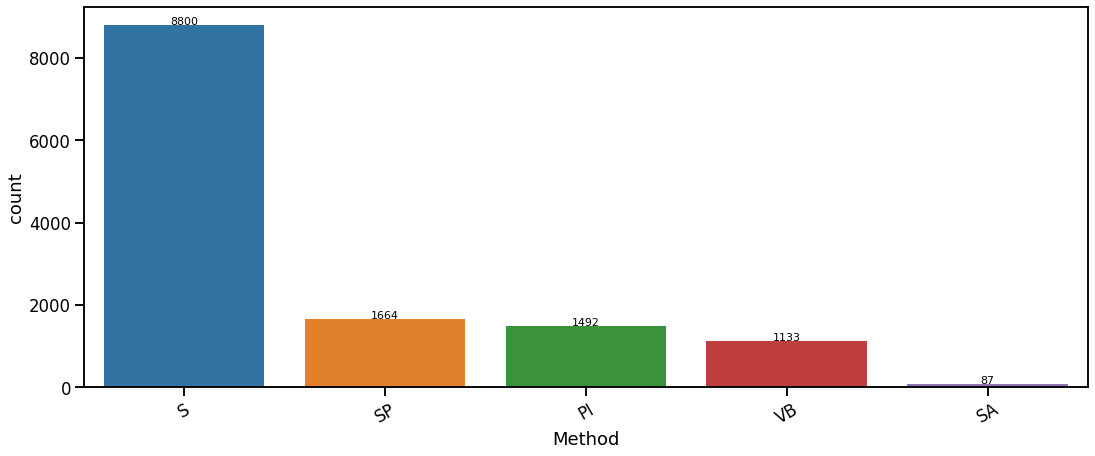

In [ ]:
estudio(df['Method'])

Vamos a agrupar PI, VB y SA como un solo otros

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 3


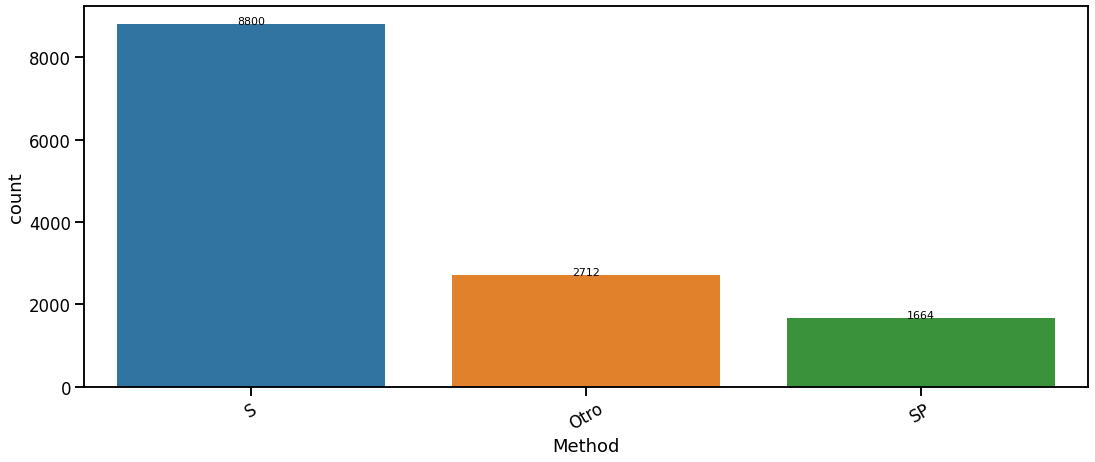

In [ ]:
dict={'PI':'Otro','VB':'Otro','SA':'Otro'}
df['Method'].replace(dict,inplace=True)
estudio(df['Method'])

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 8


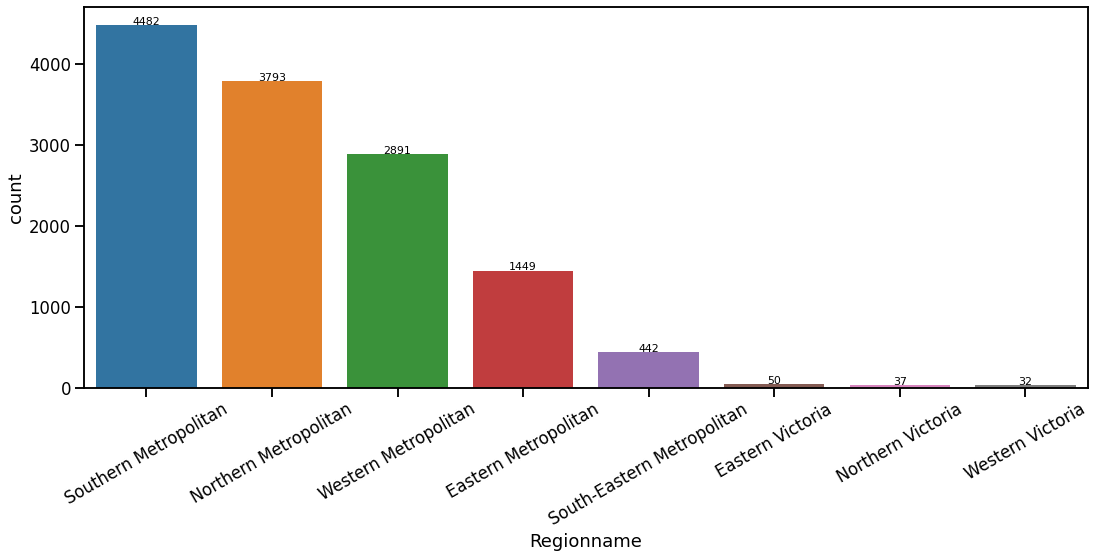

In [ ]:
estudio(df['Regionname'])

Cantidad de NaN: 0
Tipo de variable:  categoria
Cantidad de valores unicos: 6


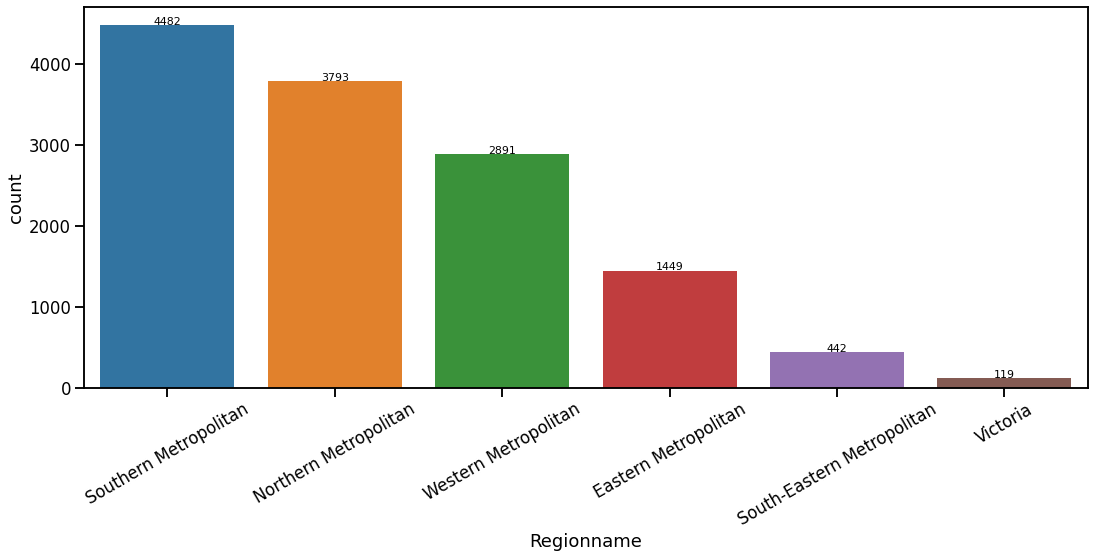

In [ ]:
dict={'Eastern Victoria':'Victoria','Northern Victoria':'Victoria','Western Victoria':'Victoria'}
df['Regionname'].replace(dict,inplace=True)
estudio(df['Regionname'])

#### Variables a Excluir


In [ ]:
excluir={'Address','SellerG','Date','Bedroom2','Propertycount'}

svariables=set(variables)
svariables=svariables-excluir
variables=list(svariables)
for i in excluir:
  df=df.drop([i], axis=1)

In [ ]:
df

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,date
0,Abbotsford,2,h,1480000.00,S,2.50,3067.00,1,1,202.00,nan,<NA>,Yarra,-37.80,145.00,Northern Metropolitan,2016-03-12
1,Abbotsford,2,h,1035000.00,S,2.50,3067.00,1,0,156.00,79.00,1900,Yarra,-37.81,144.99,Northern Metropolitan,2016-04-02
2,Abbotsford,3,h,1465000.00,SP,2.50,3067.00,2,0,134.00,150.00,1900,Yarra,-37.81,144.99,Northern Metropolitan,2017-04-03
3,Abbotsford,3,h,850000.00,Otro,2.50,3067.00,2,1,94.00,nan,<NA>,Yarra,-37.80,145.00,Northern Metropolitan,2017-04-03
4,Abbotsford,4,h,1600000.00,Otro,2.50,3067.00,1,2,120.00,142.00,2014,Yarra,-37.81,144.99,Northern Metropolitan,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.00,S,16.70,3150.00,2,2,652.00,nan,1981,NaN,-37.91,145.17,South-Eastern Metropolitan,2017-08-26
13576,Williamstown,3,h,1031000.00,SP,6.80,3016.00,2,2,333.00,133.00,1995,NaN,-37.86,144.88,Western Metropolitan,2017-08-26
13577,Williamstown,3,h,1170000.00,S,6.80,3016.00,2,4,436.00,nan,1997,NaN,-37.85,144.89,Western Metropolitan,2017-08-26
13578,Williamstown,4,h,2500000.00,Otro,6.80,3016.00,1,5,866.00,157.00,1920,NaN,-37.86,144.89,Western Metropolitan,2017-08-26


### 3.Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22753 non-null  object 
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.3+ MB


In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']
airbnb_df.isna().sum()

description                332
neighborhood_overview     8471
street                       0
neighborhood              5813
city                         0
suburb                      23
state                       61
zipcode                    142
latitude                     0
longitude                    0
price                        0
weekly_price             20371
monthly_price            21004
dtype: int64

la columna precio no tiene valores perdidos, comparada con weekly price o monthly price, entiendo que s epodria usar la mediana

  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  

In [ ]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

Cantidad de NaN: 146
Tipo de variable:  continua
Limite superior propuesto (cuantil 0.99): 3803.0 
Valores que quedarian fuera: 226

Limite inferior propuesto (cuantil 0.01): 3000.0  
Valores que quedarian fuera: 3

count   22749.00
mean     3116.91
std       257.11
min      2010.00
25%      3006.00
50%      3068.00
75%      3163.00
max     30122.00
Name: zipcode, dtype: float64
(3000.0, 3803.0, 0       3105.00
1       3057.00
2       3182.00
3       3071.00
4       3183.00
          ...  
22890   3053.00
22891   3338.00
22892   3150.00
22893   3006.00
22894   3053.00
Name: zipcode, Length: 22895, dtype: float64)
zipcode con más de 10 propiedades : 248


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



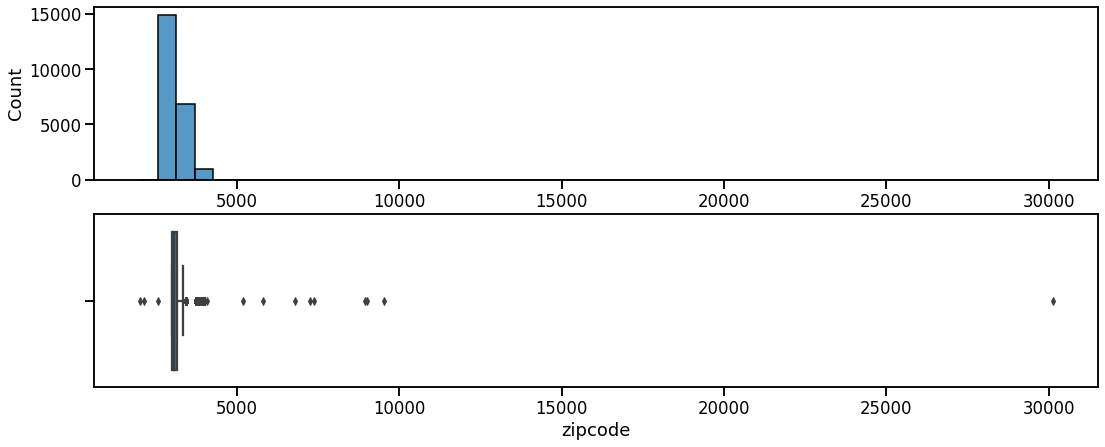

In [ ]:
min=10
serie=estudio(airbnb_df['zipcode'],n=30,min=min)
print(serie)
print(f'zipcode con más de {min} propiedades :',len(serie[2].unique()))

In [ ]:
#df['Postcode']=serie

In [ ]:
airbnb_df[relevant_cols + ['zipcode']]\
  .groupby('zipcode').mean().reset_index()[:5]

,zipcode,price,weekly_price,monthly_price
0,2010.00,40.00,nan,nan
1,2134.00,50.00,nan,nan
2,2582.00,104.00,nan,nan
3,3000.00,150.50,918.74,3407.20
4,3001.00,132.50,nan,nan


3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


La columna Suburb es una buena variable para combinar

In [ ]:
airb=set(airbnb_df.suburb.unique())
melb=set(melb_df.Suburb.unique())

intersections = airb.intersection(melb)
print("Airbnb unique Suburb", len(airbnb_df.suburb.unique()))
print("Sales unique Suburb", len(melb_df.Suburb.unique()))
print("Common Suburb", len(intersections))

Airbnb unique Suburb 543
Sales unique Suburb 314
Common Suburb 296


In [ ]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


In [ ]:
print('Records in Sales df with corresponding suburb form Airbnb df',
      melb_df.Suburb.isin(intersections).sum() / len(melb_df))
print('Records in Airbnb df with corresponding suburb form Sales df',
      airbnb_df.suburb.isin(intersections).sum() / len(airbnb_df))

Records in Sales df with corresponding suburb form Airbnb df 0.9908689248895435
Records in Airbnb df with corresponding suburb form Sales df 0.8990172526752566


In [ ]:
#Intento de salvar valores fuera de la intercepcion de codigo postal
melb_dfnzc=melb_df[(~melb_df.Postcode.isin(intersection))]
melbnzc=set(melb_dfnzc.Suburb.unique())

intersectionsnzc = airb.intersection(melbnzc)
print("Airbnb unique Suburb", len(airbnb_df.suburb.unique()))
print("Sales unique Suburb", len(melb_dfnzc.Suburb.unique()))
print("Common Suburb", len(intersectionsnzc))


Airbnb unique Suburb 543
Sales unique Suburb 8
Common Suburb 0


In [ ]:
#Intento de salvar valores fuera de la intercepcion de suburbios
melb_dfnsb=melb_df[(~melb_df.Suburb.isin(intersections))]
melbnsb=set(melb_dfnsb.Postcode.unique())

intersectionsnsb = airb.intersection(melbnsb)
print("Airbnb unique Zipcode", len(airbnb_df.zipcode.unique()))
print("Sales unique Postcode", len(melb_dfnsb.Postcode.unique()))
print("Common zipcode", len(intersectionsnsb))

Airbnb unique Zipcode 248
Sales unique Postcode 17
Common zipcode 0


In [ ]:
airbnb_df[(airbnb_df.suburb.isin(intersections))].isna().sum()

description                301
neighborhood_overview     7651
street                       0
neighborhood              4736
city                         0
suburb                       0
state                       48
zipcode                    114
latitude                     0
longitude                    0
price                        0
weekly_price             18338
monthly_price            18882
dtype: int64

In [ ]:
airbnb_df[(airbnb_df.zipcode.isin(intersection))].isna().sum()

description                306
neighborhood_overview     7903
street                       0
neighborhood              5052
city                         0
suburb                       1
state                       57
zipcode                      0
latitude                     0
longitude                    0
price                        0
weekly_price             18920
monthly_price            19496
dtype: int64

## Ejercicio 2: Imputación



### 1.Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).




### 2.Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.